In [1]:
%pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/624.3 kB 404.0 kB/s eta 0:00:01
   -------------------------------------- 624.3/624.3 kB 424.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Load Data
file_path = '../../data/raw_analyst_ratings.csv'
data = pd.read_csv(file_path)

In [5]:
# Basic Inspection
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Head:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 0

In [6]:
# Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [7]:
# Handle Missing Values
# Drop rows with any missing values
data = data.dropna()

print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [8]:
# Descriptive Statistics
# Headline Length Analysis
data['headline_length'] = data['headline'].apply(len)
print("\nHeadline Length Statistics:")
print(data['headline_length'].describe())


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [9]:
# Publisher Analysis
publisher_counts = data['publisher'].value_counts()
print("\nTop Publishers:")
print(publisher_counts.head(10))


Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [10]:
# Publication Date Trends
data['date'] = pd.to_datetime(data['date'], utc=True,format='ISO8601')
data['day_of_week'] = data['date'].dt.day_name()
print("\nPublication Count by Day of Week:")
print(data['day_of_week'].value_counts())



Publication Count by Day of Week:
day_of_week
Thursday     302619
Wednesday    300922
Tuesday      296505
Monday       265139
Friday       217918
Sunday        16466
Saturday       7759
Name: count, dtype: int64


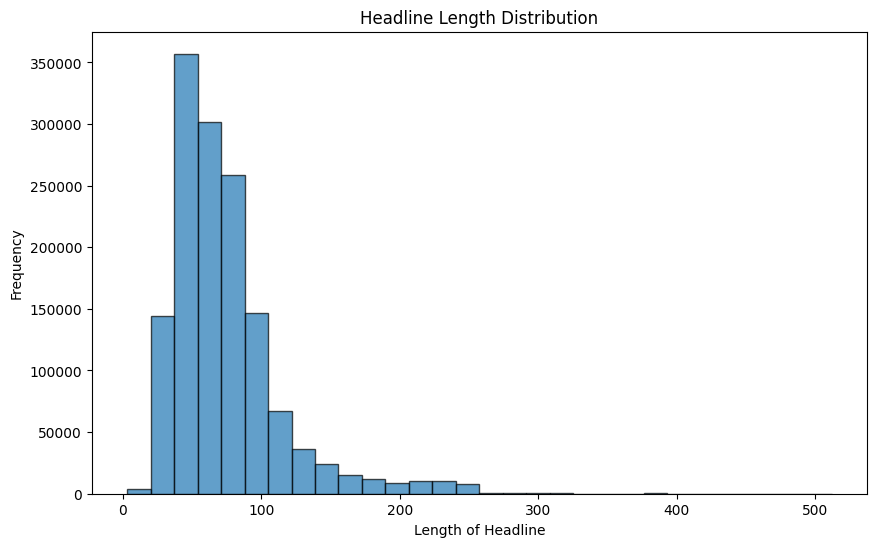

In [11]:
# Visualization - Headline Length Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['headline_length'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Headline Length Distribution')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()

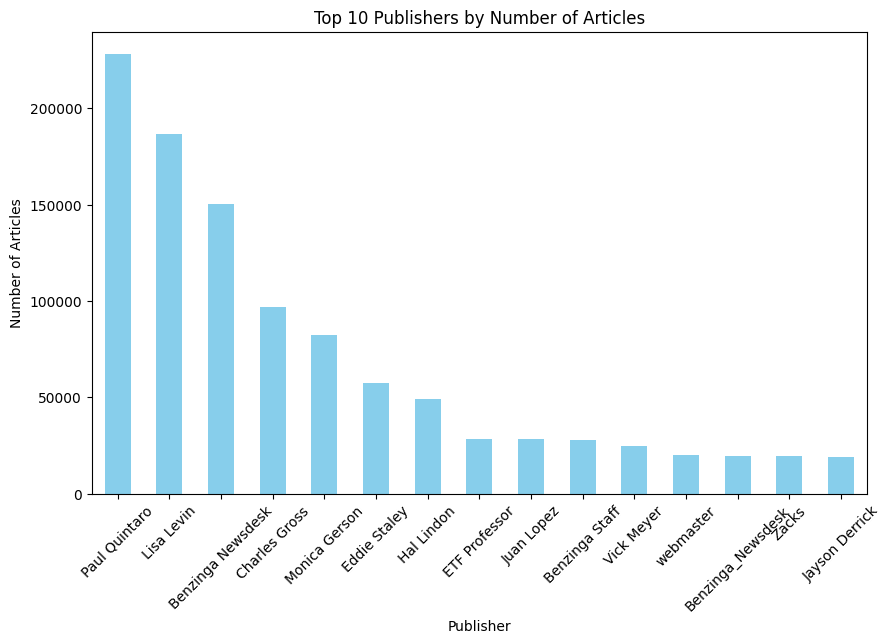

In [12]:
# Visualization - Publisher Contributions
plt.figure(figsize=(10, 6))
publisher_counts.head(15).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Text Analysis - Sentiment Analysis
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

In [14]:
data['sentiment'] = data['headline'].apply(get_sentiment)
print("\nSentiment Statistics:")
print(data['sentiment'].describe())


Sentiment Statistics:
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


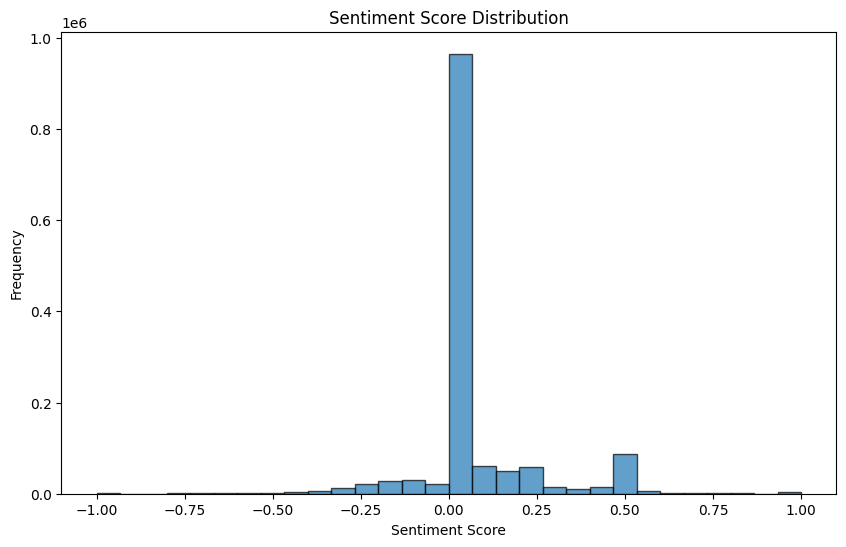

In [15]:
# Visualization - Sentiment Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Keyword Extraction
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(data['headline'])
keywords = vectorizer.get_feature_names_out()
print("\nTop Keywords:")
print(keywords)


Top Keywords:
['earnings' 'eps' 'est' 'market' 'reports' 'sales' 'shares' 'stocks'
 'update' 'vs']


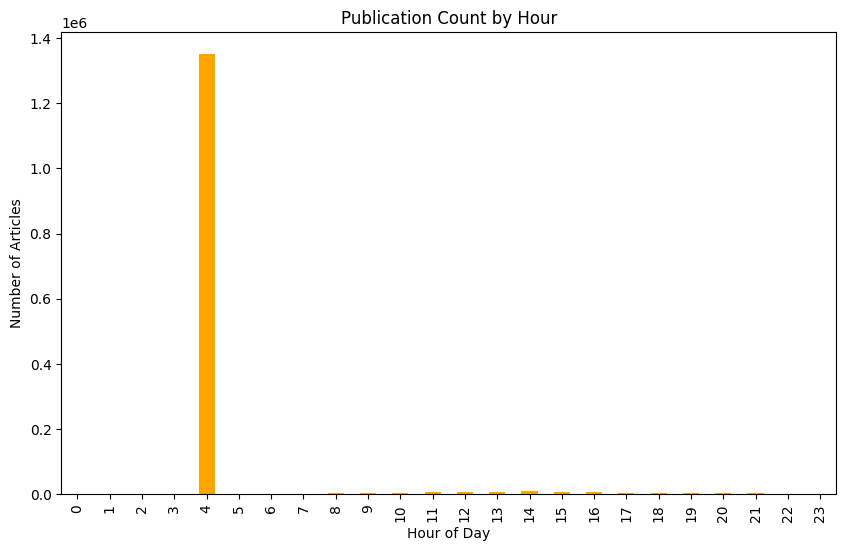

In [17]:
# Time Series Analysis - Publication Times
data['hour'] = data['date'].dt.hour
hourly_distribution = data['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_distribution = hourly_distribution.reindex(range(24), fill_value=0)
hourly_distribution.plot(kind='bar', color='orange')
plt.title('Publication Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
# Save Processed Data
data.to_csv('../../data/processed_financial_news.csv', index=False)